In [72]:
import sys,os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('./bin')
import bPcycle_2bs_3states_rev1_A_B_prec50 as code50
import bPcycle_2bs_3states_rev1_A_B_prec100 as code100
import matplotlib as mpl

mpl.rcParams['font.size']=12

In [73]:
def fullpars(pars):
    
    k_1_0,k_1r_0,k_2_0,k_3_0,a1,a1r,a2,a3,b1,b1r,b2,b3,k_1_1U2,k_1r_1U2,k_2_1U2,k_3_1U2,kon1,kon2,koff1,koff2=pars
             
    k_1_1=a1
    k_1r_1=a1r
    k_2_1=a2 #10**a2
    k_3_1=a3 #10**a3
    k_1_2=b1#10**b1
    k_1r_2=b1r
    k_2_2=b2
    k_3_2=b3#10**b3
    
    a1_0_1=kon1
    a1_0_2=kon1
    a1_0_3=kon1
    a2_0_1=kon2
    a2_0_2=kon2
    a2_0_3=kon2
    a1_2_1=kon1
    a1_2_2=kon1
    a1_2_3=kon1
    a2_1_1=kon2
    a2_1_2=kon2
    a2_1_3=kon2
    
    b1_1_1=koff1
    b1_1_2=koff1
    b1_1_3=koff1
    b2_2_1=koff2
    b2_2_2=koff2
    b2_2_3=koff2
    b1_1U2_1=koff1
    b1_1U2_2=koff1
    b1_1U2_3=koff1
    b2_1U2_1=koff2
    b2_1U2_2=koff2
    b2_1U2_3=koff2
    
    
    pars=np.array([a1_0_1,k_1_0,k_1r_0,a1_0_2,k_2_0,a1_0_3,k_3_0,b1_1_1,k_1_1,k_1r_1,
                   b1_1_2,k_2_1,b1_1_3,k_3_1,a2_0_1,a2_0_2,a2_0_3,b2_2_1,
                   k_1_2,k_1r_2,b2_2_2,k_2_2,b2_2_3,k_3_2,a2_1_1,a2_1_2,a2_1_3,b2_1U2_1,
                   k_1_1U2,k_1r_1U2,b2_1U2_2,k_2_1U2,b2_1U2_3,k_3_1U2,a1_2_1,a1_2_2,a1_2_3,b1_1U2_1,b1_1U2_2,b1_1U2_3])
    return pars 

def compute_parset(pars,B=0,code=code50):
    Arange=np.logspace(-1,1,100)
    
    
    m0=code.interfacess(pars.copy(),np.array([0,B]))
    if m0<1e-10:
        print("zero")
        print(pars)
        sys.stdout.flush()
    #print(m0)
    out=np.zeros(len(Arange))
    for a,A in enumerate(Arange):
        mA=code.interfacess(pars.copy(),np.array([A,B]))
        out[a]=mA/m0
    return out

def plot_parset(pars,B=0,title=None,ax=None,color="k",label=None,code=code50,linestyle="-",n=100,xrange=None):
    if xrange:
        Arange=np.logspace(np.log10(xrange[0]),np.log10(xrange[1]),n)
    else:
        Arange=np.logspace(-1,1,n)
    
    
    m0=code.interfacess(pars.copy(),np.array([0,B]))
    print(m0)
    out=np.zeros(len(Arange))
    for a,A in enumerate(Arange):
        mA=code.interfacess(pars.copy(),np.array([A,B]))
        out[a]=mA/m0
    #ax=plt.subplots(1,1,figsize=(6,4))
    if ax is None:
        fig,ax=plt.subplots(1,1,figsize=(3,2.5))
        show=True
    else:
        show=False
    ax.plot(Arange,out,color=color,label=label,linestyle=linestyle)
    ax.set_xscale("log")
    ax.set_xlabel(r"$x$",size=14)
    #if k==0:
    #ax.set_ylabel('fold change',size=14)
    ax.axhline(y=1,linestyle="--",color=color)
    if title is not None:
         ax.set_title(title)
    if show:
        plt.tight_layout()
        plt.show()
        return 
    else:
        return ax
    

In [74]:
figsfolder="./figscode"

$k_{1,\emptyset}=1.0$, $k_{4,\emptyset}=0.5$, $k_{2,\emptyset}=0.25$, $k_{3,\emptyset}=5.0$, $k_{1,x}=25.0$, $k_{4,x}=0.5$, $k_{2,x}=3.75$, $k_{3,x}=5.0$, $k_{1,y}=1.0$, $k_{4,y}=0.5$, $k_{2,y}=12.5$, $k_{3,y}=5.0$, $k_{1,\{x,y\}}=25.0$, $k_{4,\{x,y\}}=0.5$, $k_{2,\{x,y\}}=0.375$, $k_{3,\{x,y\}}=5.0$, pars0=[1.0,0.5,0.25,5.0]
parsA=[25.0,0.5,3.75,5.0]
parsB=[1.0,0.5,12.5,5.0]
parsAB=[25.0,0.5,0.375,5.0]
kon1,kon2,koff1_,koff2=0.04,50.0,0.1,1.0
0.755911339195646
0.1388888888888889
0.755911339195646
0.1388888888888889
0.755911339195646
0.1388888888888889


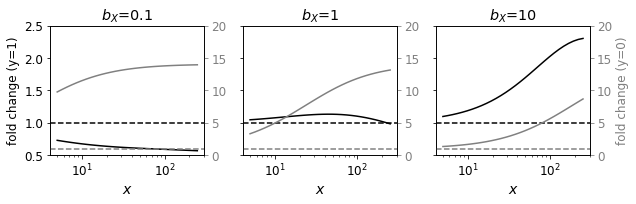

In [76]:
#this one in paper

k10=1
k1r0=0.5
k20=0.25
k30=5

a1=k10*25
a1r=k1r0
a2=k20*15
a3=k30

b1=k10
b1r=k1r0
b2=k20*50
b3=k30


pars0=[k10,k1r0,k20,k30]
parsA=[a1,a1r,a2,a3]
parsB=[b1,b1r,b2,b3]
parsAB=[a1,k1r0,k20*1.5,k30] #the TFs interfere with each other: when they are together the increase in a2 is much less than for each separately
kon1,kon2,koff1,koff2=[0.04,50,1,1]
xlplot=[5,250]

colors=["k","gray"]
linestyles=["-","-"]
fig,axes=plt.subplots(1,3,figsize=(9,3),sharey=True)
a=0
kofflist=[koff1*0.1,koff1,koff1*10]
parnames0=["$k_{1,\emptyset}","$k_{4,\emptyset}","$k_{2,\emptyset}","$k_{3,\emptyset}"]
parnamesx=["$k_{1,x}","$k_{4,x}","$k_{2,x}","$k_{3,x}"]
parnamesy=["$k_{1,y}","$k_{4,y}","$k_{2,y}","$k_{3,y}"]
parnamesxy=["$k_{1,\\{x,y\\}}","$k_{4,\\{x,y\\}}","$k_{2,\\{x,y\\}}","$k_{3,\\{x,y\\}}"]
allparnames=parnames0+parnamesx+parnamesy+parnamesxy
for zip_ in zip(allparnames,np.concatenate((pars0,parsA,parsB,parsAB))):
    print(zip_[0]+"="+str(zip_[1]), end="$, ")

for koff1_ in kofflist:
    pars=np.concatenate((pars0,parsA,parsB,parsAB,np.array([kon1,kon2,koff1_,koff2])))
    
    if a==0:
        print("pars0=[%s]"%(",".join(map(str,pars[0:4]))))
        print("parsA=[%s]"%(",".join(map(str,pars[4:8]))))
        print("parsB=[%s]"%(",".join(map(str,pars[8:12]))))
        print("parsAB=[%s]"%(",".join(map(str,pars[12:16]))))
        print("kon1,kon2,koff1_,koff2=%s"%(",".join(map(str,pars[16:]))))
    parvalues=fullpars(pars)
    for a_,B in enumerate([1,0]):
        ax=axes[a%3]
        if a_==1:
            ax=ax.twinx()
            ax.set_ylim(0,20)
            title=None
        else:
            title="$b_X$=%g"%(koff1_)
            ax.set_ylim(0,2)
        #ax.set_ylim(0.5,2)
        plot_parset(parvalues,B=B,title=title,ax=ax,color=colors[a_],label="B=%g"%B,linestyle=linestyles[a_],n=30,xrange=xlplot)
        if (a==0 and a_==0) or (a==2 and a_==1):
            ax.set_ylabel("fold change (y=%d)"%B,color=colors[a_])
            
        ax.tick_params(axis='y', colors=colors[a_])
        
    a+=1

for ax in axes:
    
    ax.set_ylim(0.5,2.5)
plt.tight_layout()
plt.savefig("./figscode/FigS5_plots.svg",bbox_inches="tight")
plt.show()
        